In [51]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [52]:
sns.set_style("whitegrid")

# Results

In [97]:
with open("results3.pickle",'rb') as f:
    result = pickle.load(f)

In [98]:
permutations = ["1E506", "1E304", "1E449","1E149", "1E21", "1E10"]
weights = ["2E6", "1E6", "1E6", "1E6", "1E6", "1E6"]
order = [5, 4, 3, 1, 2, 0]

In [99]:
result_df = pd.DataFrame(columns=["Model", "Approx. permutations amount", "Approx. weights amount", "Validation accuracy", "Validation loss"])
for i in order:
    result_df = result_df.append({"Model": i , \
                                  "Approx. permutations amount":permutations[i],
                                  "Approx. weights amount":weights[i],
                                  "Validation accuracy":max(result[i]['val_acc']),
                                  "Validation loss":min(result[i]['val_loss'])
                                 }, ignore_index=True)

### Models description:
* Model 0 - dense, 1 layer
* Model 1 - dense, 2 layers
* Model 2 - dense, 3 layers
* Model 3 - dense resnet, 3 layers
* Model 4 - 2 convolutional layers, 1 dense
* Model 5 - resnet with 2 convolutional layers, 1 dense


Results are sorted from highest to lowest permutations amount.

In [100]:
result_df

,Model,Approx. permutations amount,Approx. weights amount,Validation accuracy,Validation loss
0,5,1E10,1E6,0.9779,0.080820
1,4,1E21,1E6,0.9712,0.107859
2,3,1E149,1E6,0.9698,0.112946
3,1,1E304,1E6,0.9677,0.114379
4,2,1E449,1E6,0.9677,0.112629
5,0,1E506,2E6,0.9720,0.102974


## Acuracies by permutations amount

Text(0.5, 1.0, 'Accuracies')

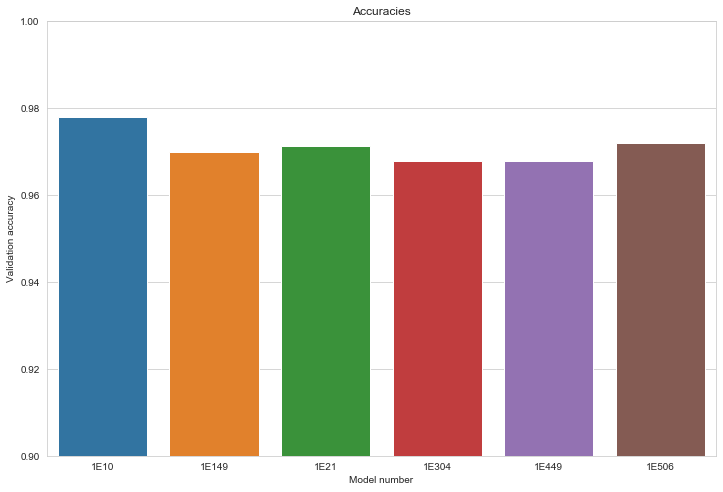

In [103]:
plt.figure(figsize=(12, 8))
accs = [max(r['val_acc']) for r in result]
sns.barplot(x="Approx. permutations amount" ,y="Validation accuracy", data=result_df)
plt.ylim([0.9, 1])
plt.xlabel("Model number")
plt.ylabel("Validation accuracy")
plt.title("Accuracies")

## Losses by permutations amount

Text(0, 0.5, 'Validation loss')

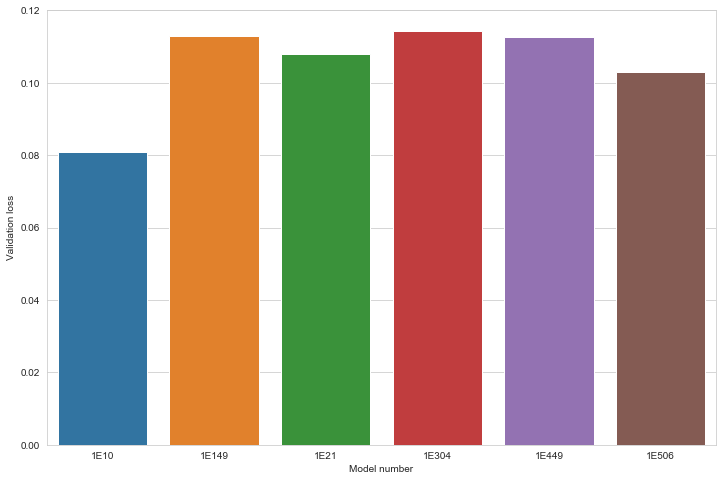

In [105]:
plt.figure(figsize=(12, 8))
accs = [max(r['val_acc']) for r in result]
sns.barplot(x="Approx. permutations amount" ,y="Validation loss", data=result_df)
plt.xlabel("Model number")
plt.ylabel("Validation loss")

## Accuracies

(0.9, 1)

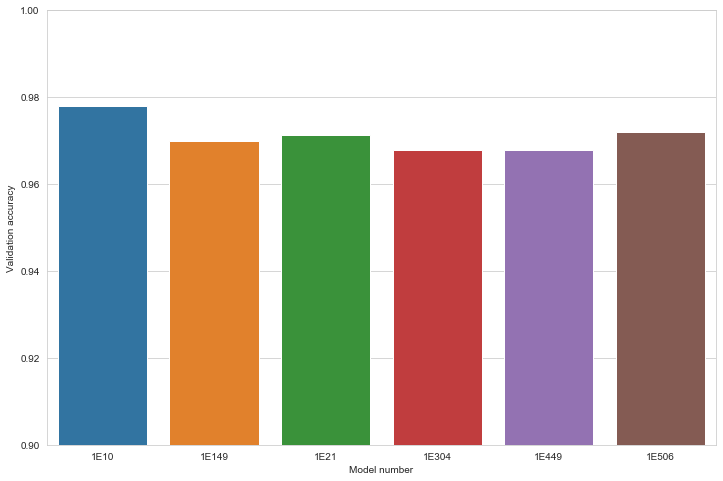

In [110]:
plt.figure(figsize=(12, 8))
accs = [max(r['val_acc']) for r in result]
sns.barplot(x="Approx. permutations amount" ,y="Validation accuracy", data=result_df.sort_values(by="Model"))
plt.xlabel("Model number")
plt.ylabel("Validation accuracy")
plt.ylim([0.9, 1])
